In [174]:
using Laplacians


In [175]:
include("../src/KMPSolver.jl")
include("../devel/kmpTest.jl")


manyRunsW (generic function with 1 method)

In [176]:
?pcg

search: 

No documentation found.

`Laplacians.pcg` is a generic `Function`.

```julia
# 3 methods for generic function "pcg":
pcg(mat, b::Array{Float64,1}, pre) at /Users/spielman/.julia/v0.4/Laplacians/src/pcg.jl:42
pcg(mat, b::Array{Float32,1}, pre) at /Users/spielman/.julia/v0.4/Laplacians/src/pcg.jl:46
pcg(mat, b, pre) at /Users/spielman/.julia/v0.4/Laplacians/src/pcg.jl:50
```


pcg ProcessGroup productGraph spectralDrawing process_running



In [172]:
n = 1000000
a = chimera(n,4)
la = lap(a)
b = randn(n);
b = b - mean(b);

#t = akpw(a)
#heavy = makeHeavy(a,t)
#lheavy = lap(heavy);

A test of the solver code, with some param settings thrown in

In [173]:
KMP_LOGGING = true
KMP_SAVEMATS = true
t = akpw(a)
T = 6.0
p = (16/9)*T^(-2)
params=KMPparams(p,T,1,500)
@time f = KMPLapSolver(a,params=params,tol=0.1,maxits=1000)
@time x = f(b)
@show norm(la*x-b)/norm(b);

aveStretch : 16.735633592741184 fac : 333.567428504806
level : 0
rest : 5213412, dim : 1000000
Sample by 0.04938271604938271. From : 5213412 to : 334946
level : 1
rest : 334946, dim : 581116
Sample by 0.04938271604938271. From : 334946 to : 16674
level : 2
rest : 16674, dim : 50339
Sample by 0.04938271604938271. From : 16674 to : 824
level : 3
rest : 824, dim : 2599
Sample by 0.04938271604938271. From : 824 to : 43
 23.880913 seconds (13.40 M allocations: 4.749 GB, 12.47% gc time)
103.282466 seconds (4.19 M allocations: 47.474 GB, 15.12% gc time)
norm(la * x - b) / norm(b) = 0.09932928513904504


before your program finished. To profile for longer runs, call Profile.init
with a larger buffer and/or larger delay.


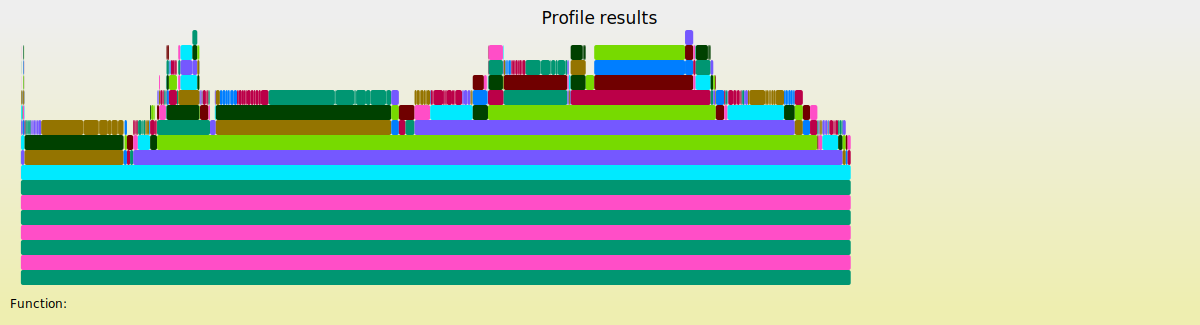

In [167]:
Profile.clear()
@profile f(b);
ProfileView.view()

In [119]:
(353546 - 3*(99999))/2

26774.5

In [126]:
KMP_MATS

2-element Array{Any,1}:
 100000x100000 sparse matrix with 313324 Float64 entries:
	[1     ,      1]  =  1324.57
	[2     ,      1]  =  -441.524
	[53339 ,      1]  =  -441.524
	[83191 ,      1]  =  -441.524
	[1     ,      2]  =  -441.524
	[2     ,      2]  =  2207.62
	[3     ,      2]  =  -441.524
	[4     ,      2]  =  -883.047
	[36708 ,      2]  =  -441.524
	[2     ,      3]  =  -441.524
	⋮
	[99996 ,  99996]  =  1324.57
	[99997 ,  99996]  =  -441.524
	[99998 ,  99996]  =  -441.524
	[99996 ,  99997]  =  -441.524
	[99997 ,  99997]  =  441.524
	[99996 ,  99998]  =  -441.524
	[99998 ,  99998]  =  441.524
	[83195 ,  99999]  =  -441.524
	[99999 ,  99999]  =  441.524
	[83195 , 100000]  =  -441.524
	[100000, 100000]  =  441.524
 17896x17896 sparse matrix with 53852 Float64 entries:
	[1    ,     1]  =  1030.22
	[2    ,     1]  =  -441.524
	[9623 ,     1]  =  -441.524
	[14681,     1]  =  -147.175
	[1    ,     2]  =  -441.524
	[2    ,     2]  =  1177.4
	[3    ,     2]  =  -294.349
	[6599 ,     2] 

In [127]:
KMP_FS

2-element Array{Any,1}:
 (anonymous function)
 f                   

In [138]:
la2 = KMP_MATS[1];
f2 = KMP_FS[2];
f1 = KMP_FS[2];
n2 = size(la2,1)


100000

In [137]:
b = randn(n2);
b = b - mean(b);
x = f1(b);
norm(la2*x-b)/norm(b)

1.4484457482467895e-6

A comparison with our old solver

In [168]:
@time fa = lapWrapSolver(augTreeSolver,la,tol=0.1,maxits=1000)
@time xa = fa(b)
@show norm(la*xa-b)/norm(b);


 14.686592 seconds (8.19 M allocations: 3.286 GB, 13.36% gc time)
 26.368265 seconds (8.68 k allocations: 20.616 GB, 7.65% gc time)
norm(la * xa - b) / norm(b) = 0.09986900537942897


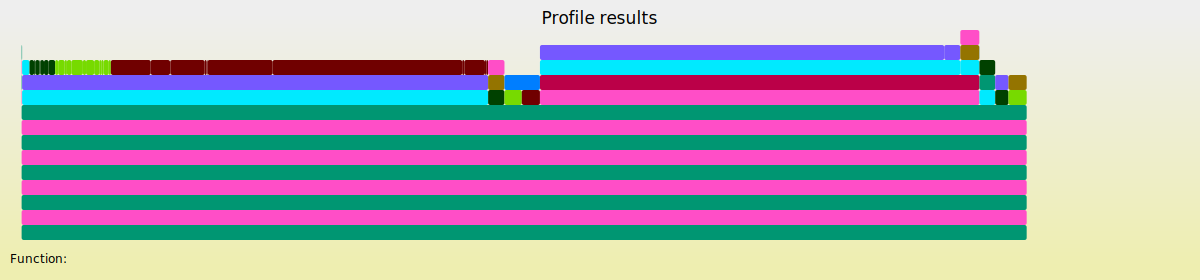

In [169]:
Profile.clear()
@profile fa(b);
ProfileView.view()

To understand what's going on, let's look at how quickly it solves the precon system.


In [88]:
KMP_LOGGING = true
# t = akpw(a)
T = 6.0
p = 2*T^(-2)
ord = Laplacians.dfsOrder(t)
aord = a[ord,ord]
tord = t[ord,ord]

params=KMPparams(p,T,2,500)
heavy = makeHeavy(aord, t=tord, params=params)
lh = lap(heavy)
@time fsub =  KMPLapPrecon(aord, tord, params)
@time xh = fsub(b)
@show norm(lh*xh-b)/norm(b);

level : 0
rest : 420461, dim : 100000
ave nnz : 3.6102
level : 1
rest : 30511, dim : 55157
ave nnz : 3.061424660514531
level : 2
rest : 1695, dim : 5175
ave nnz : 3.0394202898550726
level : 3
rest : 103, dim : 354
ave nnz : 3.0395480225988702
  0.422798 seconds (2.05 k allocations: 210.262 MB, 38.73% gc time)
  0.325699 seconds (23.53 k allocations: 146.708 MB, 6.17% gc time)
norm(lh * xh - b) / norm(b) = 14.044453111937235


In [92]:
xh = pcg(lh, b, fsub, tol=1e-2, maxits=60)
norm(lh*xh-b)/norm(b)

0.00992807861720216

In [75]:
nnz(triu(a,1))

520460

In [20]:
Profile.clear()

In [11]:
@profile fsub(b);

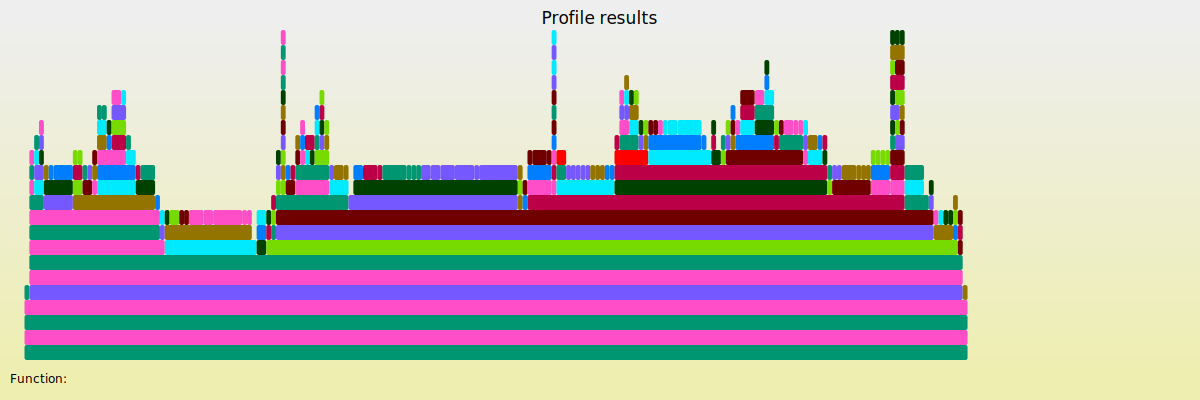

In [13]:
using ProfileView
ProfileView.view()

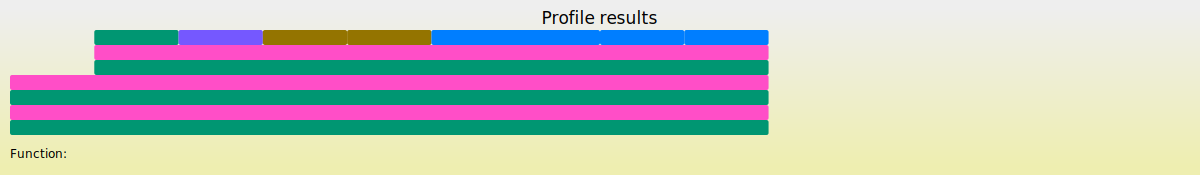

In [65]:
#Profile.clear()
n = 1000000
a = chimera(n,1)
b = randn(n)
@profile a*b;
ProfileView.view()

In [75]:
function ms1(x)
    mn = mean(x)
    for i in 1:length(x)
        x[i] = x[i] - mn
    end
end

ms1 (generic function with 1 method)

In [79]:
n = 10000900
x = randn(n)
@time x = x - mean(x);
y = randn(n)
@time ms1(y)
mean(y)

  0.036993 seconds (7 allocations: 76.301 MB, 43.75% gc time)
  

-7.207096872831902e-18

0.029886 seconds (4 allocations: 160 bytes)


In [97]:
function manyRuns(n,numruns,pList)
    tot = zeros(length(pList))
    for it in 1:numruns
        a = chimera(n,n+it)
        b = randn(n)
        b = b - mean(b)
        for i in 1:length(pList)
            fsub =  KMPLapPrecon(a, akpw(a), pList[i])
            tic()
            xh = fsub(b)
            tot[i] += toq()
        end

    end

            
    for i in 1:length(pList)
        println(string(pList[i]), " : ", tot[i])
    end

    return tot
end

function manyRunsW(n,numruns,pList)
    tot = zeros(length(pList))
    for it in 1:numruns
        a = wtedChimera(n,n+it)
        b = randn(n)
        b = b - mean(b)
        for i in 1:length(pList)
            fsub =  KMPLapPrecon(a, akpw(a), pList[i])
            tic()
            xh = fsub(b)
            tot[i] += toq()
        end
        
    end
    
    for i in 1:length(pList)
        println(string(pList[i]), " : ", tot[i])
    end
    return tot
end

manyRunsW (generic function with 1 method)

The following gave a best n0=400, at least on a few small experiments.  Another puts it at 800.

In [63]:
T = 6.0
p = (16/9)*T^(-2)
pList = [KMPparams(p,T,2,100)]
push!(pList,KMPparams(p,T,2,200))
push!(pList,KMPparams(p,T,2,400))
push!(pList,KMPparams(p,T,2,800))
push!(pList,KMPparams(p,T,2,1600))
zeros(length(pList))

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [98]:
KMP_LOGGING = true
totx = manyRuns(1000,2,pList);

level : 0
293, 1000
level : 0
293, 1000
level : 0
293, 1000
level : 0
659, 1000
level : 1
90, 273
level : 0
659, 1000
level : 1
34, 114
level : 0
659, 1000
level : 1
30, 97
KMPparams(0.1111111111111111,4,2.0,600) : 0.00083652
KMPparams(0.04938271604938271,6,2.0,600) : 0.00083124
KMPparams(0.027777777777777776,8,2.0,600) : 0.001329904


In [68]:

tot2 = manyRunsW(40000,50,pList)


level : 0
22851, 40000
level : 1
1625, 4864
level : 2
80, 288
elapsed time: 0.041699741 seconds
level : 0
22851, 40000
level : 1
1570, 4718
level : 2
80, 290
elapsed time: 0.040702559 seconds
level : 0
22851, 40000
level : 1
1710, 5087
level : 2
83, 304
elapsed time: 0.038048572 seconds
level : 0
22851, 40000
level : 1
1703, 5080
level : 2
86, 323
elapsed time: 0.04214054 seconds
level : 0
22851, 40000
level : 1
1693, 5066
level : 2
85, 311
elapsed time: 0.046605466 seconds
level : 0
31267, 40000
level : 1
2255, 6871
level : 2
104, 383
level : 3
4, 16
elapsed time: 0.067270144 seconds
level : 0
31267, 40000
level : 1
2281, 7062
level : 2
121, 442
elapsed time: 0.05379596 seconds
level : 0
31267, 40000
level : 1
2317, 7206
level : 2
121, 443
elapsed time: 0.119249393 seconds
level : 0
31267, 40000
level : 1
2385, 7313
level : 2
119, 438
elapsed time: 0.045671156 seconds
level : 0
31267, 40000
level : 1
2306, 7040
level : 2
88, 325
elapsed time: 0.046159991 seconds
level : 0
10008, 40000

5-element Array{Float64,1}:
 4.45022
 3.90676
 3.6484 
 3.15669
 3.38124

280775222 seconds


In [65]:
tot

5-element Array{Float64,1}:
 4.14874
 3.45089
 2.99432
 3.27581
 3.11367

In [69]:
tot2

5-element Array{Float64,1}:
 4.45022
 3.90676
 3.6484 
 3.15669
 3.38124

The following experiment suggests T = 6.0

In [78]:
T = 4.0
pList = [KMPparams((16/9)*T^(-2),T,2,600)]
T = 6.0
push!(pList,KMPparams((16/9)*T^(-2),T,2,600))
T = 8.0
push!(pList,KMPparams((16/9)*T^(-2),T,2,600))

tot3 = manyRuns(30000,70,pList)

level : 0
15000, 30000
level : 1
1720, 6281
level : 2
182, 719
elapsed time: 0.024620212 seconds
level : 0
15000, 30000
level : 1
761, 2927
level : 2
33, 130
elapsed time: 0.026047165 seconds
level : 0
15000, 30000
level : 1
416, 1620
elapsed time: 0.0485643 seconds
level : 0
60714, 30000
level : 1
8464, 16931
level : 2
966, 3094
level : 3
103, 364
elapsed time: 0.079806405 seconds
level : 0
60714, 30000
level : 1
3834, 9852
level : 2
198, 686
elapsed time: 0.057956734 seconds
level : 0
60714, 30000
level : 1
2102, 6117
level : 2
75, 266
elapsed time: 0.069612256 seconds
level : 0
75746, 30000
level : 1
11893, 17720
level : 2
1352, 3846
level : 3
162, 546
elapsed time: 0.084012727 seconds
level : 0
75746, 30000
level : 1
5234, 10919
level : 2
246, 812
elapsed time: 0.063676167 seconds
level : 0
75746, 30000
level : 1
2972, 7255
level : 2
78, 274
elapsed time: 0.05943557 seconds
level : 0
29989, 30000
level : 1
3455, 7866
level : 2
389, 1075
elapsed time: 0.042375187 seconds
level : 0
2

3-element Array{Float64,1}:
 3.62288
 3.11987
 3.73121

074337688 seconds


In [79]:
tot3

3-element Array{Float64,1}:
 3.62288
 3.11987
 3.73121

In [87]:
print(string(pList[1]))

KMPparams(0.1111111111111111,4,2.0,600)

In [45]:
marked = 0 + (rand(n) .< 0.6)
b = randn(n)
b = b - mean(b)
lt = lap(t)
lt[1,1] = lt[1,1] + 1
x = recTest12x(t, b, marked)
norm(lt*x-b);


LoadError: LoadError: went of the end of the kid list without finding node to elim from
while loading In[45], in expression starting on line 6

5.515545 seconds (744.05 k allocations: 3.327 GB, 11.30% gc time)
norm(la * x - b) / norm(b) = 0.21378296018567286


In [ ]:
@time F = factorize(lt)

@time y = F \ b

norm(y - x)

In [ ]:
elims1, elims2 = elimDeg12(t, marked)

In [ ]:
(rand(5) .< 0.6) + 0

In [ ]:
elims1

In [ ]:
elims2

In [ ]:
ind = find(marked.<2)

In [ ]:
ts = t[ind,ind];
lt = lap(t)
lt[1,1] = lt[1,1] + 1
lts = lap(ts)
lts[1,1] = lts[1,1] + 1
b = randn(n);


In [ ]:
cumb = copy(b)

for i in 1:length(elims1)
    cumb[elims1[i].parent] += cumb[elims1[i].nodeid]
end
cumbs = cumb[ind]
sum(cumbs)

In [ ]:
xs = lts \ cumbs
norm(lts*xs-cumbs)

In [ ]:
x = zeros(n)
x[ind] = xs
for i in length(elims1):-1:1
    node = elims1[i].nodeid
    x[node] = x[elims1[i].parent] + cumb[node]/elims1[i].wtDeg
end
norm(lt*x-b)

In [ ]:
y = la \ b;
norm(la*y-b)
[y[ind] x[ind] xs]

In [ ]:
sum(las)

In [ ]:
function recTest(t,b, marked)

    n = length(b)

    elims1 = elimDeg1(t, marked)

    cumb = copy(b)

    for i in 1:length(elims1)
        cumb[elims1[i].parent] += cumb[elims1[i].nodeid]
    end


    ind = find(marked.<2)
    ts = t[ind,ind];
    lts = lap(ts)

    cumbs = cumb[ind]
    xs = pinv(full(lts))*cumbs
    
    x = zeros(n)
    x[ind] = xs
    for i in length(elims1):-1:1
        node = elims1[i].nodeid
        x[node] = x[elims1[i].parent] + cumb[node]/elims1[i].wtDeg
    end

    return x
    
end


In [ ]:
mkd = rand(0:1,n)
#elims1 = elimDeg1(t, mkd)
#ind = find(mkd .< 2)

In [ ]:
cumb = copy(b)

for i in 1:length(elims1)
    cumb[elims1[i].parent] += cumb[elims1[i].nodeid]
end
cumbs = cumb[ind]
sum(cumbs)

In [ ]:
sum(cumbs)

In [ ]:
b = randn(n)
b = b - mean(b)
lt = lap(t)
x = pinv(full(lt)) * b
norm(lt*x-b)

In [ ]:
x = recTest(t, b, mkd)
norm(lt*x-b)

In [ ]:
sum(mkd.==2)

In [ ]:
norm(b)

In [ ]:
function makeElimList(t)
    tr = matToTree(t)
    n = size(tr.children,1)  
    
    elims = Array{elimTreeNode}(0)
    for vi in n:-1:2
        v = tr.children[vi]
        push!(elims,elimTreeNode(v,tr.parent[v],tr.weights[vi]))
    end
    
    return elims
end

In [ ]:
function solveTree(elims,b)
    cumb = copy(b)
    n = size(b,1)
    for i in 1:(n-1)
        cumb[elims[i].parent] += cumb[elims[i].nodeid]
    end
    x = zeros(Float64,n)
    for i in (n-1):-1:1
        node = elims[i].nodeid
        x[node] = x[elims[i].parent] + cumb[node]/elims[i].wtDeg
    end
    return x
    
end

In [ ]:
@time el = makeElimList(t);

In [ ]:
lt = lap(t)
lt[end,end] += 1
@time F = factorize(lt)

In [ ]:
b = randn(size(t,1));
b = b - mean(b);
@time x = solveTree(el,b);
x = x - mean(x);
norm(lap(t)*x-b)

In [ ]:
@time y = F \ b;
norm(lt*y-b)

In [ ]:
elims = Array{elimTreeNode}(0)

In [ ]:
for vi in n:-1:2
    v = tr.children[vi]
    push!(elims,elimTreeNode(v,tr.parent[v],tr.weights[vi]))
end

In [ ]:
elims

In [ ]:
b = randn(n)
b = b - mean(b)

In [ ]:
cumb = copy(b)
for i in 1:(n-1)
    cumb[elims[i].parent] += cumb[elims[i].nodeid]
end
cumb

In [ ]:
x = zeros(Float64,n)
for i in (n-1):-1:1
    node = elims[i].nodeid
    x[node] = x[elims[i].parent] + cumb[node]/elims[i].wtDeg
end
x

In [ ]:
xs = pinv(full(lt))*b

In [ ]:
x-xs

In [ ]:
x = x - mean(x)

In [ ]:
lt*x - b

In [ ]:
b

In [ ]:
tr.weights

In [ ]:
st = compStretches(t,a);
aveStretch = sum(st)/nnz(a)

In [ ]:
rest = a-t;
fac = aveStretch*log(size(a,1))*2
heavy = rest+fac*t;

In [ ]:
fac

Sample with probability prop to stretch, but fix the number of edges we get to n/5

In [ ]:
n = size(a,1);

In [ ]:
strest = compStretches(t,rest)
probs = triu(strest);
probs = probs * (n/5)/ sum(probs);


In [ ]:
(pi,pj,pv) = findnz(probs)

In [ ]:
select = rand(size(pv)) .< pv;
sum(select)

In [ ]:
(ai,aj,av) = findnz(triu(rest))

In [ ]:
samp1 = sparse(ai,aj,av.*select./pv,n,n)
samp1 = samp1 + samp1';

In [ ]:
st1 = compStretches(t*fac, samp1);

In [ ]:
(s1i,s1j,s1v) = findnz(triu(samp1))

In [ ]:
maximum(x)

In [ ]:
a = chimera(100000,103+1111);
testGraph(a);


In [ ]:
include("../devel/kmpTest.jl")

In [ ]:
testAtSize(10000)

In [ ]:
x = testKMP(a,frac1 = 1/5, frac2 = 1/10)

In [ ]:
    (pi,pj,pv) = findnz(probs)
    select = rand(size(pv)) .< pv;
    (ai,aj,av) = findnz(triu(rest))
    
    samp1 = sparse(ai,aj,av.*select./pv,n,n)
#    samp1 = samp1 + samp1';
    
#    st1 = compStretches(t*fac, samp1);
#    (s1i,s1j,s1v) = findnz(triu(samp1))

In [ ]:
ringGraph(1)

In [ ]:
a = wtedChimera(1000000)
@time t = akpw(a);


In [ ]:
n = size(t,1)
nnz(a)

In [ ]:
@time ord = Laplacians.dfsOrder(t);

In [ ]:
@time aord = symperm(a,ord);
@time aord = aord + aord';

In [ ]:
pe = randperm(n)
@time ape = symperm(a,pe)
@time ape = ape + ape';

In [ ]:
x = randn(n)
@time b1 = ape*x;
@time b2 = aord*x;

In [ ]:
@show nnz(ape)
@show nnz(aord)

In [ ]:
tord = t[ord,ord];

In [ ]:
@time st1 = compStretches(tord,aord);

In [ ]:
@time st2 = compStretchesDFS(tord,aord);

In [ ]:
sum(abs(st1-st2))

In [ ]:
@time tr, d1 = matToTreeDepth(tord);

In [ ]:
@time d2 = treeDepthDFS(tord);

In [ ]:
norm(d1-d2)

In [ ]:
function dfsOrder2(t::SparseMatrixCSC)
    n = size(t,1)
    seen = zeros(Bool,n)
    ord = Array{Int64}(0)
    stk = Array{Int64}(0)
    push!(stk,1)
    while ~isempty(stk)
        u = pop!(stk)
        push!(ord,u)
        seen[u] = true
        for vi in t.colptr[u]:(t.colptr[u+1]-1)
            v = t.rowval[vi]
            if !seen[v]
                push!(stk,v)
            end
        end
    end
    return ord

end

In [ ]:
ord = dfsOrder(tr);

In [ ]:
stack = Array{Int64}(0)

In [ ]:
~isempty(stack)

In [ ]:
function dfsOrder2(tr)
    ord = Array{Int64}(0)
    stack = Array{Int64}(0)
    push!(stack,tr.root)
    while ~isempty(stack)
        u = pop!(stack)
        push!(ord,u)
        for  vi in tr.kidsPtr[u]:(tr.numKids[u] + tr.kidsPtr[u] - 1)
            v = tr.children[vi]
            push!(stack,v)
        end
    end
    return ord

end

In [ ]:
ord2 = dfsOrder2(tr);

In [ ]:
norm(ord - ord2[size(tr.children,1):-1:1])

In [ ]:
# n = 100000
a = grid2(1000)
t = akpw(a)
aves = sum(compStretches(t,a))/nnz(a)

In [ ]:
avc = zeros(10)
for i in 1:10
    ap = randperm(a)
    tp = akpw(ap)
    avc[i] = sum(compStretches(tp,ap))/nnz(a)
end
mean(avc)

In [ ]:
avc

In [ ]:
?akpw!

In [ ]:
a = grid2(700)
@time t = akpw(a,exponentialX=false)
@show sum(compStretches(t,a))/nnz(a)
@time t = akpw(a,exponentialX=true)
@show sum(compStretches(t,a))/nnz(a);

In [ ]:
nits = 100
df = Array{Float64}(0)
dt = Array{Float64}(0)
timef = Array{Float64}(0)
timet = Array{Float64}(0)
for i in 1:nits
    a = wtedChimera(500000)
    tic();
    t = akpw(a,exponentialX=false)
    push!(timef,toc())
    push!(df,sum(compStretches(t,a))/nnz(a))
    
    tic();
    t = akpw(a,exponentialX=true)
    push!(timet,toc())
    push!(dt,sum(compStretches(t,a))/nnz(a))
    
    a = unweight(a)
    tic();
    t = akpw(a,exponentialX=false)
    push!(timef,toc())
    push!(df,sum(compStretches(t,a))/nnz(a))
    
    tic();
    t = akpw(a,exponentialX=true)
    push!(timet,toc())
    push!(dt,sum(compStretches(t,a))/nnz(a))
end
    


In [ ]:
x = collect(1:length(dt));
plot(x,sort(timet),"rx",x,sort(timef),"bo")

In [ ]:
plot(x,sort(timet./timef),"rx",x,sort(timef./timet),"bo")

In [ ]:
plot(x,sort(dt./df),"rx",x,sort(df./dt),"bo")

In [ ]:
mean(df)

In [ ]:
mean(dt)

In [ ]:
plot(x,sort(df),"rx",x,sort(dt),"bo")

In [ ]:
mean(timet)

In [ ]:
mean(df)

In [ ]:
mean(dt)

In [ ]:
function testSampler(a; t=akpw(a), frac1=1/5)


    n = size(a,1);

    rest = a-t;

    st = compStretches(t,rest);
    aveStretch = sum(st)/nnz(rest)
    @show aveStretch
    

    fac = aveStretch*log(size(a,1))*3
    heavy = rest+fac*t;

    (ai,aj,av) = findnz(triu(rest))
    (si,sj,sv) = findnz(triu(st))
    sv = sv ./ fac

    restijvs = restIJVS(ai,aj,av,sv)

    sampijvs = stretchSample2(restijvs,frac1)
    
    samp1 = sparse(sampijvs.i,sampijvs.j,sampijvs.v,n,n)
    samp1 = samp1 + samp1';
    
    st1 = compStretches(t*fac, samp1);
    (s1i,s1j,s1v) = findnz(triu(samp1))

    add = speye(n)/10^6;
    e = eigs(lap(heavy)+add,lap(samp1+t*fac)+add, nev=4);

    return maximum(e[1])
end


In [ ]:
a = grid2(50)
t = akpw(a)
frac1 = 2/3
    n = size(a,1);

    rest = a-t;

    st = compStretches(t,rest);
    aveStretch = sum(st)/nnz(rest)
    @show aveStretch
    

    fac = aveStretch*log(size(a,1))
    heavy = rest+fac*t;

    (ai,aj,av) = findnz(triu(rest))
    (si,sj,sv) = findnz(triu(st))
    sv = sv ./ fac

    restijvs = restIJVS(ai,aj,av,sv)

    sampijvs = stretchSample(restijvs,frac1)
    

In [ ]:
include("../src/KMPSolver.jl")
include("../devel/kmpTest.jl")

In [ ]:
n = 1000000
a = chimera(n)
la = lap(a)
b = randn(n);
b = b - mean(b);

t = akpw(a)
heavy = makeHeavy(a,t)
lheavy = lap(heavy);

In [ ]:
@profile f = KMPLapPrecon(a,t)
#@time xh = f(b)
#@show norm(lheavy*xh-b);

In [ ]:
Profile.clear()

In [ ]:
@time fa = lapWrapSolver(augTreeSolver,lheavy,tol=1e-2,maxits=1000)
@time xa = fa(b)
@show norm(lheavy*xa-b);

In [ ]:
function vecstats(s)
    println("length : ", size(s,1), ", min : ", minimum(s), ", mean : ", mean(s), ", max : ", maximum(s), ", sum : ", sum(s))
end

In [ ]:
vecstats(restijvs.s)

In [ ]:
a = grid2(200)
t = akpw(a)

frac1 = 1/5
    n = size(a,1);

    rest = a-t;

    st = compStretches(t,rest);
    aveStretch = sum(st)/nnz(rest)
    @show aveStretch
    

    targetStretch = 1/(2*log(n)/log(2))

In [ ]:
    fac = aveStretch/targetStretch
    heavy = rest+fac*t;

    (ai,aj,av) = findnz(triu(rest))

    (si,sj,sv) = findnz(triu(st))
    sv = sv ./ fac

    ijvs = IJVS(ai,aj,av,sv)

    ijvs1 = stretchSample(ijvs,targetStretch,frac1)
    ijvs2 = stretchSample(ijvs1,targetStretch,frac1)
    
    samp1 = sparse(ijvs1.i,ijvs1.j,ijvs1.v,n,n)
    samp1 = samp1 + samp1';
    
    samp2 = sparse(ijvs2.i,ijvs2.j,ijvs2.v,n,n)
    samp2 = samp2 + samp2';

In [ ]:
    add = speye(n)/10^6;
@time e = eigs(lap(heavy)+add,lap(samp1+t*fac)+add, nev=1, maxiter = 10);
@show maximum(e[1])
@time e = eigs(lap(samp1)+add,lap(samp2+t*fac)+add, nev=1, maxiter = 10);
@show maximum(e[1])

In [ ]:
vecstats(ijvs.s)
vecstats(ijvs1.s)
vecstats(ijvs2.s)

In [ ]:
targetStretch

In [ ]:
vecstats(sampijvs.s)

In [ ]:
mean(sampijvs.s)

In [ ]:
maximum(sampijvs.s)

In [ ]:
length(sampijvs.s)

In [ ]:
s2 = stretchSampleInner(sampijvs,1/2)
vecstats(s2.s)

In [ ]:
sum(s2.s .< 0.2)

In [ ]:
1/log(size(a,1))

In [ ]:
mean(restijvs.s)

In [ ]:
s3 = stretchSampleInner(s2,1/5)
[mean(s3.s), maximum(s3.s)]

In [ ]:
size(s3.i,1)

In [123]:
n = 10000000
p = randperm(n)
f = function()
    x = b[p]
    return x
end
f1 = function(b::Array{Float64,1})
    n = size(b,1)
    x = zeros(n)
    for i in 1:n
        x[p[i]] = b[i]
    end
end
f3 = function(b::Array{Float64,1}, p::Array{Int64,1})
    x = b[p]
    return x
end
f4 = function(b::Array{Float64,1}, p::Array{Int64,1})
    n = size(b,1)
    x = zeros(n)
    for i in 1:n
        x[i] = b[p[i]]
    end
end


    

(anonymous function)

In [126]:
b = randn(n)
q = randperm(n)
@time x = f(b);
@time y = f1(b);
@time z = f3(b,q);
@time w = f4(b,q);


  0.334165 seconds (8 allocations: 76.294 MB, 3.57% gc time)
  1.867559 seconds (30.00 M allocations: 534.042 MB, 9.52% gc time)
  0.315141 seconds (8 allocations: 76.294 MB, 0.94% gc time)
  0.292743 seconds (6 allocations: 76.294 MB, 4.09% gc time)


In [115]:
@code_warntype f3(b)